In [3]:
#import pandas and numpy libraries
import pandas as pd
import numpy as np
import sys #sys needed only for python version
#import gaussian naive bayes from scikit-learn
import sklearn as sk
#seaborn for pretty plots
import seaborn as sns

#display versions of python and packages
print('\npython version ' + sys.version)
print('pandas version ' + pd.__version__)
print('numpy version ' + np.__version__)
print('sk-learn version ' + sk.__version__)
print('seaborn version ' + sns.__version__)


python version 3.5.2 |Anaconda 4.2.0 (x86_64)| (default, Jul  2 2016, 17:52:12) 
[GCC 4.2.1 Compatible Apple LLVM 4.2 (clang-425.0.28)]
pandas version 0.18.1
numpy version 1.11.1
sk-learn version 0.17.1
seaborn version 0.7.1


In [4]:
#read in data. it's comma-separated with no column names.
df = pd.read_csv('agaricus-lepiota.data', sep=',', header=None,
                 error_bad_lines=False, warn_bad_lines=True, low_memory=False)
# set pandas to output all of the columns in output
pd.options.display.max_columns = 25
#show the first 5 rows
print(df.sample(n=5))

     0  1  2  3  4  5  6  7  8  9  10 11 12 13 14 15 16 17 18 19 20 21 22
3913  p  f  f  y  f  f  f  c  b  g  e  b  k  k  p  b  p  w  o  l  h  y  g
2829  e  x  y  n  t  n  f  c  b  p  t  b  s  s  w  p  p  w  o  p  n  y  d
905   e  f  f  w  f  n  f  w  b  p  t  e  f  s  w  w  p  w  o  e  k  s  g
844   e  x  s  y  t  a  f  c  b  g  e  c  s  s  w  w  p  w  o  p  k  n  g
5903  e  x  f  n  f  n  f  w  n  w  e  b  s  s  w  n  p  w  o  e  w  v  l


In [5]:
#add column names from documentation (1st col is class: e=edible,p=poisonous; rest are attributes)
df.columns = ['class','cap-shape','cap-surface','cap-color','bruises','odor','gill-attachment',
             'gill-spacing','gill-size','gill-color','stalk-shape','stalk-root',
             'stalk-surf-above-ring','stalk-surf-below-ring','stalk-color-above-ring','stalk-color-below-ring',
             'veil-type','veil-color','ring-number','ring-type','spore-color','population','habitat']

print("Example values:\n")
print(df.iloc[3984])

Example values:

class                     e
cap-shape                 x
cap-surface               y
cap-color                 b
bruises                   t
odor                      n
gill-attachment           f
gill-spacing              c
gill-size                 b
gill-color                e
stalk-shape               e
stalk-root                ?
stalk-surf-above-ring     s
stalk-surf-below-ring     s
stalk-color-above-ring    e
stalk-color-below-ring    w
veil-type                 p
veil-color                w
ring-number               t
ring-type                 e
spore-color               w
population                c
habitat                   w
Name: 3984, dtype: object


e    4208
p    3916
Name: class, dtype: int64


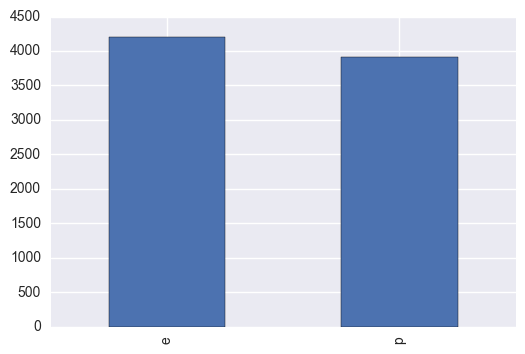

In [6]:
#show plots in notebook
%matplotlib inline

#bar chart of classes using pandas plotting
print(df['class'].value_counts())
df['class'].value_counts().plot(kind='bar')

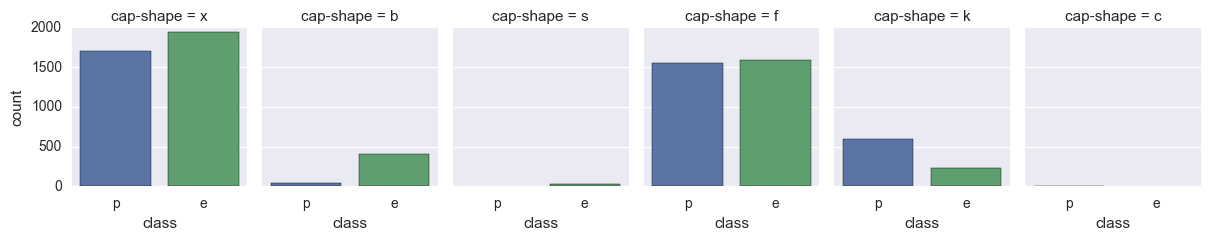

In [7]:
#seaborn factorplot to show edible/poisonous breakdown by different factors
df_forplot = df.loc[:,('class','cap-shape','gill-color')]
g = sns.factorplot("class", col="cap-shape", data=df_forplot,
                    kind="count", size=2.5, aspect=.8, col_wrap=6)

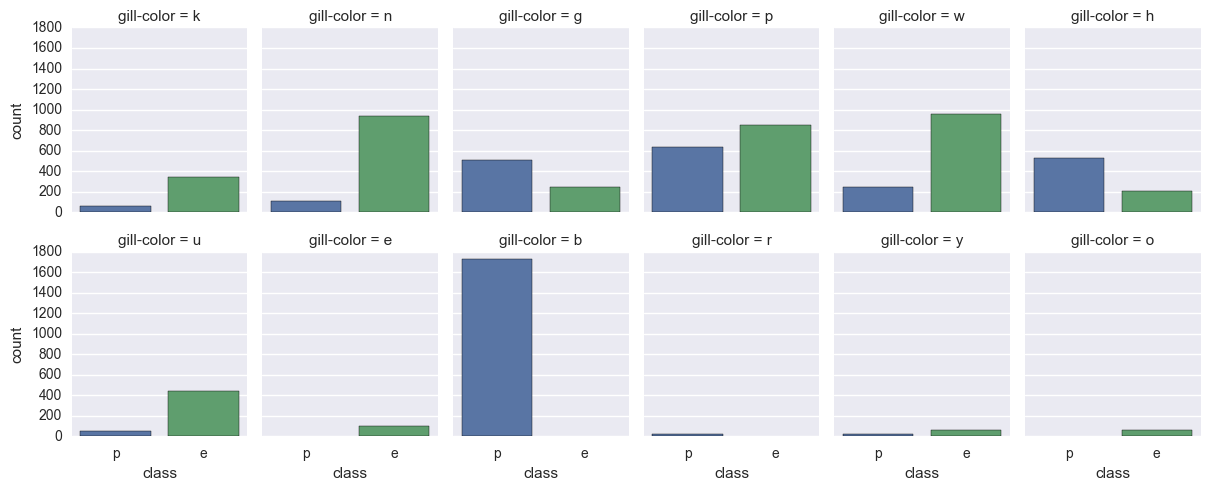

In [8]:
g = sns.factorplot("class", col="gill-color", data=df_forplot,
                    kind="count", size=2.5, aspect=.8, col_wrap=6)

In [9]:
#put the features into X (everything except the 0th column)
X = pd.DataFrame(df, columns=df.columns[1:len(df.columns)], index=df.index)
#put the class values (0th column) into Y 
Y = df['class']

#encode the text category labels as numeric
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(Y)
#print(le.classes_)
#print(np.array(Y))
#Y values now boolean values; poison = 1
y = le.transform(Y)
#print(y_train)

#have to initialize or get error below
x = pd.DataFrame(X,columns=[X.columns[0]])
#encode each feature column and add it to x_train
for colname in X.columns:
    le.fit(X[colname])
    print(colname, le.classes_)
    x[colname] = le.transform(X[colname])

print('\nExample Feature Values - row 1 in X:')
print(X.iloc[1])
print('\nExample Encoded Feature Values - row 1 in x:')
print(x.iloc[1])
print('\nClass Values (Y):')
print(np.array(Y))
print('\nEncoded Class Values (y):')
print(y)

cap-shape ['b' 'c' 'f' 'k' 's' 'x']
cap-surface ['f' 'g' 's' 'y']
cap-color ['b' 'c' 'e' 'g' 'n' 'p' 'r' 'u' 'w' 'y']
bruises ['f' 't']
odor ['a' 'c' 'f' 'l' 'm' 'n' 'p' 's' 'y']
gill-attachment ['a' 'f']
gill-spacing ['c' 'w']
gill-size ['b' 'n']
gill-color ['b' 'e' 'g' 'h' 'k' 'n' 'o' 'p' 'r' 'u' 'w' 'y']
stalk-shape ['e' 't']
stalk-root ['?' 'b' 'c' 'e' 'r']
stalk-surf-above-ring ['f' 'k' 's' 'y']
stalk-surf-below-ring ['f' 'k' 's' 'y']
stalk-color-above-ring ['b' 'c' 'e' 'g' 'n' 'o' 'p' 'w' 'y']
stalk-color-below-ring ['b' 'c' 'e' 'g' 'n' 'o' 'p' 'w' 'y']
veil-type ['p']
veil-color ['n' 'o' 'w' 'y']
ring-number ['n' 'o' 't']
ring-type ['e' 'f' 'l' 'n' 'p']
spore-color ['b' 'h' 'k' 'n' 'o' 'r' 'u' 'w' 'y']
population ['a' 'c' 'n' 's' 'v' 'y']
habitat ['d' 'g' 'l' 'm' 'p' 'u' 'w']

Example Feature Values - row 1 in X:
cap-shape                 x
cap-surface               s
cap-color                 y
bruises                   t
odor                      a
gill-attachment           f


In [10]:
# actually doing the damn machine learning
#split the dataset into training and test sets
from sklearn.cross_validation import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33)

#initialize and fit the naive bayes classifier
from sklearn.naive_bayes import GaussianNB
skgnb = GaussianNB()
skgnb.fit(x_train,y_train)
train_predict = skgnb.predict(x_train)
#print(train_predict)

#see how accurate the training data was fit
from sklearn import metrics
print("Training accuracy:",metrics.accuracy_score(y_train, train_predict))

#use the trained model to predict the test values
test_predict = skgnb.predict(x_test)
print("Testing accuracy:",metrics.accuracy_score(y_test, test_predict))

Training accuracy: 0.925592504134
Testing accuracy: 0.916076091011


In [12]:
print("\nClassification Report:")
print(metrics.classification_report(y_test, test_predict, target_names=['edible','poisonous']))
print("\nConfusion Matrix:")
skcm = metrics.confusion_matrix(y_test,test_predict)
#putting it into a dataframe so it prints the labels
skcm = pd.DataFrame(skcm, columns=['predicted-edible','predicted-poisonous'])
skcm['actual'] = ['edible','poisonous']
skcm = skcm.set_index('actual')


print(skcm)

print("\nScore (same thing as test accuracy?): ", skgnb.score(x_test,y_test))


Classification Report:
             precision    recall  f1-score   support

     edible       0.92      0.92      0.92      1382
  poisonous       0.91      0.91      0.91      1299

avg / total       0.92      0.92      0.92      2681


Confusion Matrix:
           predicted-edible  predicted-poisonous
actual                                          
edible                 1269                  113
poisonous               112                 1187

Score (same thing as test accuracy?):  0.916076091011
